In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('Mnist_data/', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting Mnist_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting Mnist_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting Mnist_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting Mnist_data/t10k-labels-idx1-ubyte.gz


In [9]:
print(type(mnist))
print('\nNumber of train', mnist.train.num_examples)
mnist.train.images

<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>

Number of train 55000


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

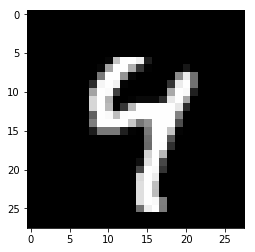

In [22]:
single_image = mnist.train.images[2].reshape(28,28)
plt.imshow(single_image, cmap='gist_gray')

In [23]:
print(single_image.min())
single_image.max()

0.0


1.0

## Start Build

1. PlaceHolder
2. Variable
3. Create Graph Operation
4. Loss Function
5. Optimizer
6. Create Session

In [35]:
# PlaceHolder
X = tf.placeholder(dtype=tf.float32, shape=[None, 784])

In [36]:
# Variable
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [37]:
# Create Graph Variable
y_pred = tf.matmul(X, W) + b

In [40]:
# Loss Function 
y_true = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

In [41]:
# Optimizer 
Optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train = Optimizer.minimize(cross_entropy)

In [47]:
# Create Session
init = tf.global_variables_initializer()

with tf.Session() as sess:
    
    sess.run(init)
    
    for step in range(100000):
        batch_x , batch_y = mnist.train.next_batch(batch_size=100)
        
        sess.run(train, feed_dict={X: batch_x, y_true: batch_y})
        
    # Evalute 
    correct_pred = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
    
    # argmax will return the index of the max value
    # for [.2, .1, .5] it will return 2
    # if ture and prediction match it will return True
    
    acc = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    # convert the {True, False] to [1, 0] and Calculate the mean
    
    print(sess.run(acc, feed_dict={ X:mnist.test.images,y_true:mnist.test.labels}))

0.9268
